In [1]:
import pandas as pd


In [5]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [6]:
train_model = pd.read_csv('train_model_2.0.csv')

In [7]:
y = train_model['WnvPresent']

In [8]:
X = train_model.drop('WnvPresent', 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(6976, 26) (6976,)
(3437, 26) (3437,)


In [13]:
rfc = RandomForestClassifier(random_state=41)
param_grid = {'n_estimators': [300, 500, 700, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth':
              [5, 10, 15, 20]}
clf = GridSearchCV(rfc, param_grid, cv=5, scoring = 'roc_auc')
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print(clf.best_score_, clf.best_params_, clf.best_estimator_)

(0.83940125673122057, {'max_features': 'auto', 'n_estimators': 300, 'max_depth': 5}, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=41,
            verbose=0, warm_start=False))


In [15]:
rfc = RandomForestClassifier(n_estimators = 300, max_features = 'auto', max_depth = 5, random_state=41)
model = rfc.fit(X_train, y_train)

In [17]:
predict = rfc.predict(X_test)

In [18]:
train_predictions = rfc.predict_proba(X_train)[:,1]

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
fpr, tpr, thresholds = roc_curve(y_train, train_predictions)
roc_auc = auc(fpr, tpr)
    
print roc_auc

0.877458018958


In [20]:
rfc.feature_importances_

array([ 0.05012874,  0.04701817,  0.03277408,  0.02186191,  0.10730299,
        0.065399  ,  0.04328124,  0.13136657,  0.13774216,  0.04253072,
        0.03783065,  0.07866155,  0.13904744,  0.06505477])

In [22]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(20)

,importance
Longitude,0.139047
Last14Average_Daylight,0.137742
Last7Average_Daylight,0.131367
Last14Average_Temp,0.107303
Latitude,0.078662
Last14Average_Windspeed,0.065399
month,0.065055
Last7Average_Temp,0.050129
Species_fac,0.047018
Last14Total_Rainfall,0.043281


(-1, 14)

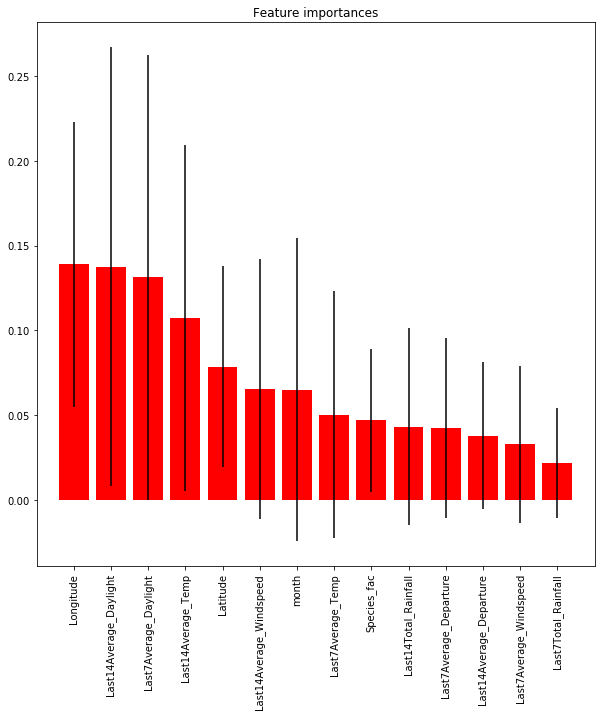

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

all(rfc.feature_importances_ == np.mean([tree.feature_importances_ for tree in rfc.estimators_], axis=0))

importances = rfc.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [19]:
#for submission to Kaggle:

In [27]:
test_model_II = pd.read_csv('test_model_2.0.csv')

In [28]:
submission_TS_2 = pd.DataFrame(test_model_II['Id'], index=None)

In [29]:
test_ = test_model_II.drop('Id', 1)

In [30]:
predictions = rfc.predict_proba(test_)[:,1]

In [31]:
submission_TS_2['WnvPresent'] = predictions

In [34]:
submission_TS_2.to_csv('submission_TS_2.csv', index=False)